In [1]:
!pip install datasets
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.6 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

ds = load_dataset("openlifescienceai/mmlu_professional_medicine")

README.md:   0%|          | 0.00/857 [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/149k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

In [3]:
dft = ds['test'].to_pandas()
dfv = ds['validation'].to_pandas()
dfd = ds['dev'].to_pandas()

In [4]:
dft.head()

,subject_name,data,id
0,professional_medicine,{'Correct Answer': 'Compression of the lateral...,d35b26d3-5346-4011-9809-2b073cb1744d
1,professional_medicine,{'Correct Answer': 'hypotonic uterine dysfunct...,e62abe39-a3d4-42c6-b64c-b2ad8eef0b97
2,professional_medicine,{'Correct Answer': 'The findings are clinicall...,01685126-421a-4d5b-b8cb-0fbc3ca62de4
3,professional_medicine,"{'Correct Answer': 'Systemic hypertension', 'C...",8cba7b22-c808-45e3-856c-05fc9f133ab7
4,professional_medicine,"{'Correct Answer': 'Ulnar nerve at the elbow',...",ef819ffa-712b-4ab5-9b83-6851ffcddfc0


In [5]:
from pprint import pprint

pprint(dft.iloc[0].data, sort_dicts=False)

{'Correct Answer': 'Compression of the lateral femoral cutaneous nerve',
 'Correct Option': 'C',
 'Options': {'A': 'Cerebral infarction during the hospitalization',
             'B': 'Complication of the IVC filter placement',
             'C': 'Compression of the lateral femoral cutaneous nerve',
             'D': 'Hematoma of the left thigh'},
 'Question': 'A 67-year-old woman comes to the physician for a follow-up '
             'examination. She had a pulmonary embolism and required treatment '
             'in the hospital for 3 weeks. She had a retroperitoneal '
             'hemorrhage; anticoagulant therapy was temporarily discontinued, '
             'and she underwent placement of an inferior vena cava (IVC) '
             'filter. She had a hematoma that was resolving on discharge from '
             'the hospital 2 weeks ago. Today, she says she has had a '
             'persistent sensation of tingling and numbness of her left thigh '
             'that she did not report 

In [6]:
import pandas as pd
import copy

# Function to split data
def process_data(row):
    # Deep copy to avoid modifying original dictionary
    ques_data = copy.deepcopy(row['data'])

    # Extract correct answer and option
    correct_data = {
        "id": row["id"],
        "Correct Answer": ques_data.pop("Correct Answer", None),
        "Correct Option": ques_data.pop("Correct Option", None)
    }

    # Return modified question data and correct data separately
    return ques_data, correct_data

# Apply the function to the dataframe
dft[['processed_data', 'correct_data']] = dft.apply(process_data, axis=1, result_type="expand")

# Create new dataframes
dfq = dft[['subject_name', 'id', 'processed_data']].rename(columns={'processed_data': 'data'})
dfa = pd.DataFrame(dft['correct_data'].tolist())

In [7]:
dfq.head()

,subject_name,id,data
0,professional_medicine,d35b26d3-5346-4011-9809-2b073cb1744d,{'Options': {'A': 'Cerebral infarction during ...
1,professional_medicine,e62abe39-a3d4-42c6-b64c-b2ad8eef0b97,{'Options': {'A': 'Braxton Hicks contractions'...
2,professional_medicine,01685126-421a-4d5b-b8cb-0fbc3ca62de4,{'Options': {'A': 'The findings are clinically...
3,professional_medicine,8cba7b22-c808-45e3-856c-05fc9f133ab7,"{'Options': {'A': 'Atrial fibrillation', 'B': ..."
4,professional_medicine,ef819ffa-712b-4ab5-9b83-6851ffcddfc0,"{'Options': {'A': 'Median nerve at the wrist',..."


In [8]:
pprint(dfq.iloc[0].data, sort_dicts=False)

{'Options': {'A': 'Cerebral infarction during the hospitalization',
             'B': 'Complication of the IVC filter placement',
             'C': 'Compression of the lateral femoral cutaneous nerve',
             'D': 'Hematoma of the left thigh'},
 'Question': 'A 67-year-old woman comes to the physician for a follow-up '
             'examination. She had a pulmonary embolism and required treatment '
             'in the hospital for 3 weeks. She had a retroperitoneal '
             'hemorrhage; anticoagulant therapy was temporarily discontinued, '
             'and she underwent placement of an inferior vena cava (IVC) '
             'filter. She had a hematoma that was resolving on discharge from '
             'the hospital 2 weeks ago. Today, she says she has had a '
             'persistent sensation of tingling and numbness of her left thigh '
             'that she did not report in the hospital because she thought it '
             'would go away; the sensation has improved 

In [9]:
dfa.head()

,id,Correct Answer,Correct Option
0,d35b26d3-5346-4011-9809-2b073cb1744d,Compression of the lateral femoral cutaneous n...,C
1,e62abe39-a3d4-42c6-b64c-b2ad8eef0b97,hypotonic uterine dysfunction,C
2,01685126-421a-4d5b-b8cb-0fbc3ca62de4,The findings are clinically insignificant but ...,B
3,8cba7b22-c808-45e3-856c-05fc9f133ab7,Systemic hypertension,C
4,ef819ffa-712b-4ab5-9b83-6851ffcddfc0,Ulnar nerve at the elbow,D


In [10]:
dfa['Correct Option'].value_counts()

,count
Correct Option,
D,122
B,55
A,50
C,45


In [11]:
from groq import Groq
from google.colab import userdata

api_key = userdata.get('groq_api_key')
client = Groq(api_key=api_key)

def get_llm_res(ques_data):
  system_prompt = (
      """
      You are an expert biomedical AI assistant specializing in professional medicine:
      - Clinical and Medicinal knowlege
      - Compounds, drugs

      You will receive questions in a specific format containing:
      1. A medical scenario or clinical question
      2. Multiple choice options labeled A through D

      Input Format Example:
      {
          'Options': {
              'A': [Option A text],
              'B': [Option B text],
              'C': [Option C text],
              'D': [Option D text]
          },
          'Question': [Question text]
      }

      You must:
      1. Carefully analyze the question and each option
      2. Use your medical expertise to determine the most accurate answer
      3. Respond ONLY in the following JSON format:
      {
          "Correct Answer": ["Full text of the correct option, in double quotes"],
          "Correct Option": [Letter of the correct option ("A", "B", "C", or "D")]
      }

      Important Guidelines:
      - Provide ONLY the answer in the specified JSON format
      - Do not include explanations, reasoning, or additional commentary
      - Do not modify the response format or add additional fields
      - Make sure the keys are enclosed in double quatations to ensure proper json decoding
      - Ensure the "Correct Answer" exactly matches the text from the selected option
      - Ensure the "Correct Option" is a single uppercase letter (A, B, C, or D)
      - Be precise and accurate in your medical knowledge
      - Consider the specific anatomical location and clinical implications mentioned in questions

      Your role is to serve as a reliable source of anatomical and medical knowledge while strictly adhering to the specified input/output format requirements.
      """
    )

  user_prompt = (f"{ques_data}")

  messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
      ]

  response = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=messages,
      max_tokens=1024,
      temperature=0.3
  )

  return response.choices[0].message.content

In [12]:
dft.iloc[44].data

{'Correct Answer': 'Separation of endothelial junctions',
 'Correct Option': 'D',
 'Options': {'A': 'Disruption of vascular basement membranes',
  'B': 'Increased hydrostatic pressure',
  'C': 'Release of thromboxane',
  'D': 'Separation of endothelial junctions'},
 'Question': 'A 35-year-old man comes to the physician because of pain and swelling of his right arm where he scraped it on a tree branch 2 days ago. His temperature is 38.3°C (101°F). Examination of the right forearm shows edema around a fluctuant erythematous lesion at the site of trauma. The area is extremely tender to palpation. Which of the following is most likely the primary mechanism of the development of edema in this patient?'}

In [13]:
sampq = dfq.iloc[44].data

In [14]:
llm_ans = get_llm_res(sampq)

In [15]:
llm_ans

'{\n"Correct Answer": "Increased hydrostatic pressure",\n"Correct Option": "B"\n}'

In [16]:
import json

llmres = json.loads(llm_ans)

In [17]:
llmres["Correct Option"]

'B'

In [ ]:
import json
import time
from typing import Dict, Optional

def get_valid_llm_response(question: Dict, max_retries: int = 3, delay: float = 1.0) -> Optional[Dict]:
    """
    Repeatedly attempt to get a valid JSON response from the LLM until successful
    or max retries reached.

    Args:
        question (Dict): The question dictionary to send to LLM
        max_retries (int): Maximum number of retry attempts
        delay (float): Delay in seconds between retries

    Returns:
        Dict or None: Parsed JSON response if successful, None if all retries fail
    """
    for attempt in range(max_retries):
        try:
            # Get response from LLM
            response = get_llm_res(question)

            # Try to parse JSON
            parsed_response = json.loads(response)

            # Verify required keys exist
            if "Correct Option" in parsed_response:
                return parsed_response

        except json.JSONDecodeError:
            print(f"Attempt {attempt + 1}: Invalid JSON received")
        except KeyError:
            print(f"Attempt {attempt + 1}: Response missing required keys")
        except Exception as e:
            print(f"Attempt {attempt + 1}: Unexpected error: {str(e)}")

        # Wait before retrying if this wasn't the last attempt
        if attempt < max_retries - 1:
            time.sleep(delay)

    return None

# Process the dataframe
llm_answers = []

for index, row in dfq.iterrows():
    ques = row.data
    response = get_valid_llm_response(ques, delay=1.0)

    if response:
        llm_answers.append({
            "id": row.id,
            "llm_option": response["Correct Option"]
        })
    else:
        print(f"Failed to get valid response for question ID: {row.id}")
        # Optionally append a placeholder or skip this entry
        llm_answers.append({
            "id": row.id,
            "llm_option": None  # or some default value
        })

In [20]:
dfq[dfq['id']=="57b291fa-0919-460e-9005-f038b88106d8"]

,subject_name,id,data
106,professional_medicine,57b291fa-0919-460e-9005-f038b88106d8,"{'Options': {'A': 'Hypertension', 'B': 'Obesit..."


In [24]:
len(llm_answers)

224

In [25]:
df_llma = pd.DataFrame.from_dict(llm_answers)

In [46]:
df_final = df_llma[df_llma['llm_option'].notna()]

In [47]:
df_final

,id,Correct Answer,Correct Option,llm_option
0,d35b26d3-5346-4011-9809-2b073cb1744d,Compression of the lateral femoral cutaneous n...,C,C
1,e62abe39-a3d4-42c6-b64c-b2ad8eef0b97,hypotonic uterine dysfunction,C,C
2,01685126-421a-4d5b-b8cb-0fbc3ca62de4,The findings are clinically insignificant but ...,B,B
3,8cba7b22-c808-45e3-856c-05fc9f133ab7,Systemic hypertension,C,A
4,ef819ffa-712b-4ab5-9b83-6851ffcddfc0,Ulnar nerve at the elbow,D,D
...,...,...,...,...
102,433c3ef6-ab6f-4efa-a95c-de29c2d8a3fc,Optic nerve,C,C
103,bba9b92d-cdaf-4fd4-aec6-746cd3a3ab47,Intramuscular ceftriaxone and oral doxycycline,D,D
104,450724d3-abfe-42b1-ae7f-f9cacdaf02b6,Pouch of Douglas,C,C
105,18b7ad9f-dac2-4ddd-8f44-b3547c5eafe8,Smoking cessation program,C,C


In [48]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(df_final["Correct Option"], df_final["llm_option"])

# Compute precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(
    df_final["Correct Option"], df_final["llm_option"], labels=["A", "B", "C", "D"], average=None
)

# Convert metrics into a DataFrame for better readability
metrics_df = pd.DataFrame({
    "Class": ["A", "B", "C", "D"],
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
})

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nMetrics per class:")
print(metrics_df)

Accuracy: 0.77

Metrics per class:
  Class  Precision    Recall  F1-score
0     A   0.433333  0.812500  0.565217
1     B   0.814815  0.814815  0.814815
2     C   0.900000  0.818182  0.857143
3     D   0.966667  0.690476  0.805556


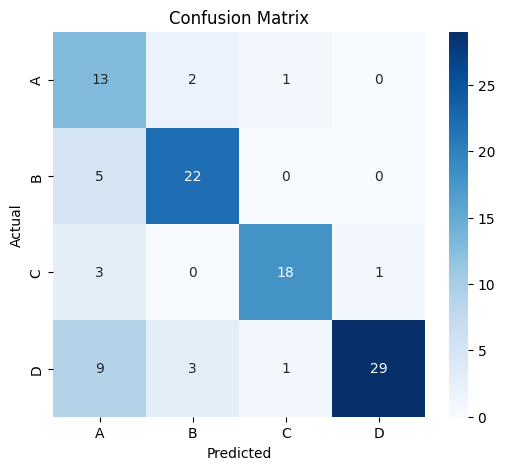

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df_final["Correct Option"], df_final["llm_option"], labels=["A", "B", "C", "D"])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["A", "B", "C", "D"], yticklabels=["A", "B", "C", "D"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import json
import time
import re
from typing import Dict, Optional, List, Union

def is_rate_limit_or_invalid_key_error(error_message: str) -> bool:
    """
    Check if the error is related to rate limits or invalid API keys.

    Args:
        error_message (str): The error message string

    Returns:
        bool: True if error is related to rate limits or invalid API keys
    """
    error_patterns = [
        r'rate\s*limit',
        r'too\s*many\s*requests',
        r'invalid\s*api\s*key',
        r'authentication\s*(?:failed|error)',
        r'api\s*key\s*(?:expired|invalid)',
        r'quota\s*exceeded',
        r'429',  # HTTP status code for too many requests
        r'401',  # HTTP status code for unauthorized
    ]

    for pattern in error_patterns:
        if re.search(pattern, error_message, re.IGNORECASE):
            return True
    return False

def get_llm_res_with_key(question: Dict, api_key: str) -> str:
    """
    Wrapper for get_llm_res that uses a specific API key.
    This function should be modified to match your actual get_llm_res implementation.

    Args:
        question (Dict): The question to send to the LLM
        api_key (str): The API key to use

    Returns:
        str: The LLM response
    """
    # Assuming get_llm_res accepts an api_key parameter
    # Modify this to match your actual implementation
    return get_llm_res(question, api_key=api_key)

def get_valid_llm_response(
    question: Dict,
    api_keys: List[str],
    max_retries: int = 3,
    delay: float = 1.0
) -> Optional[Dict]:
    """
    Repeatedly attempt to get a valid JSON response from the LLM, rotating API keys on rate limit errors.

    Args:
        question (Dict): The question dictionary to send to LLM
        api_keys (List[str]): List of API keys to use, rotating on rate limit errors
        max_retries (int): Maximum number of retry attempts per API key
        delay (float): Delay in seconds between retries

    Returns:
        Dict or None: Parsed JSON response if successful, None if all retries fail with all keys
    """
    # Keep track of which keys have been tried and failed due to rate limiting/validity
    failed_keys = set()
    current_key_idx = 0

    while len(failed_keys) < len(api_keys):
        current_key = api_keys[current_key_idx]

        # Skip keys that have already failed due to rate limiting/validity
        if current_key in failed_keys:
            current_key_idx = (current_key_idx + 1) % len(api_keys)
            continue

        for attempt in range(max_retries):
            try:
                # Get response using current API key
                response = get_llm_res_with_key(question, current_key)

                # Try to parse JSON
                parsed_response = json.loads(response)

                # Verify required keys exist
                if "Correct Option" in parsed_response:
                    return parsed_response

            except json.JSONDecodeError:
                print(f"Key {current_key_idx}, Attempt {attempt + 1}: Invalid JSON received")
            except Exception as e:
                error_message = str(e)
                print(f"Key {current_key_idx}, Attempt {attempt + 1}: Error: {error_message}")

                # If it's a rate limit or invalid key error, mark this key as failed and try another
                if is_rate_limit_or_invalid_key_error(error_message):
                    print(f"API key {current_key_idx} failed due to rate limit or validity. Switching keys.")
                    failed_keys.add(current_key)
                    break  # Break out of the retry loop for this key

            # Wait before retrying if this wasn't the last attempt
            if attempt < max_retries - 1:
                time.sleep(delay)

        # Move to the next key (using modulo to cycle through the list)
        current_key_idx = (current_key_idx + 1) % len(api_keys)

    print("All API keys have been rate limited or are invalid.")
    return None

# Process the dataframe
def process_questions_with_key_rotation(dfq, api_keys, delay=1.0):
    """
    Process all questions in the dataframe with API key rotation.

    Args:
        dfq: DataFrame with questions
        api_keys (List[str]): List of API keys to use
        delay (float): Delay between retry attempts

    Returns:
        List[Dict]: List of answers with ids and LLM options
    """
    llm_answers = []

    for index, row in dfq.iterrows():
        ques = row.data
        response = get_valid_llm_response(ques, api_keys=api_keys, delay=delay)

        if response:
            llm_answers.append({
                "id": row.id,
                "llm_option": response["Correct Option"]
            })
        else:
            print(f"Failed to get valid response for question ID: {row.id} with all API keys")
            llm_answers.append({
                "id": row.id,
                "llm_option": None
            })

    return llm_answers

# Example usage:
# api_keys = ["key1", "key2", "key3", "key4"]
# llm_answers = process_questions_with_key_rotation(dfq, api_keys, delay=1.0)